In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
df=pd.read_csv("insurance.csv")
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
#Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [16]:
# Create X (all the feature columns)
X = df.drop("charges", axis=1)

# Create y (the target column)
Y= df["charges"]

In [17]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [18]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

<AxesSubplot:xlabel='charges', ylabel='Density'>

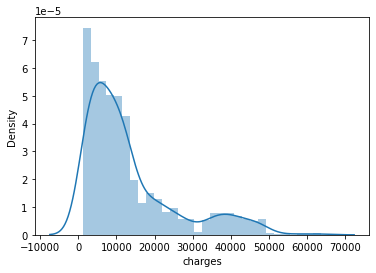

In [19]:
#charges column is postively skwed or right skwed
sns.distplot(Y)

In [20]:
#performing log transformation on target label
y=np.log10(Y)
print(y)

0       4.227499
1       3.236928
2       3.648308
3       4.342116
4       3.587358
          ...   
1333    4.025328
1334    3.343602
1335    3.212143
1336    3.302752
1337    4.464510
Name: charges, Length: 1338, dtype: float64


<AxesSubplot:xlabel='charges', ylabel='Density'>

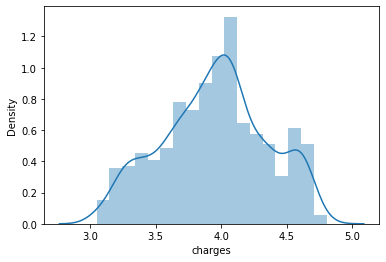

In [21]:
#plotting the distribution of the target label after log transformation
sns.distplot(y)

purpose of log values are:
1.To reduce variability in the data especially the data that has outliers
2.it is used to transform skewed data to approximately conform to normality.

In [22]:

#splitting the data into the training set and the test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

# model1: Random Forest Regressor


In [45]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [46]:
model.score(X_test,y_test)

0.8003443059833081

# model2:Multiple Linear regression

In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [50]:
reg.score(X_test,y_test)

0.7374580523110535

# model3:Decision tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
reg1=DecisionTreeRegressor()
reg1.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
reg1.score(X_test,y_test)

0.6578792584032036

# model4: Ridge linear regression

In [53]:
from sklearn.linear_model import Ridge
reg2=Ridge()
reg2.fit(X_train,y_train)

Ridge()

In [54]:
reg2.score(X_test,y_test)

0.7373571340770965

our best model is random forest regressor with a an accuracy score of 0.8003443059833081

# number4

In [64]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
model1.score(X_test,y_test)

0.8063598207949807

# RandomForestRegressor evaluation metrics

R^2 Score (coefficient of determination)

In [68]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

In [67]:
#And a perfect model would get a score of 1.
r2_score(y_test, y_test)

1.0

the R^2 Score is closer to 1 hence the model is better

Mean Absolute Error (MAE)

In [69]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.08804764409294821

Our model achieves an MAE of 0.088. This means, on average our models predictions are 0.088units away from the actual value.

In [71]:
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df1.head(7)

,actual values,predictions
37,3.362162,3.405923
1119,3.755374,3.753629
306,4.304871,3.635363
655,4.392124,4.374845
55,4.676662,4.676740
630,4.003712,4.013478
895,4.116072,4.116679


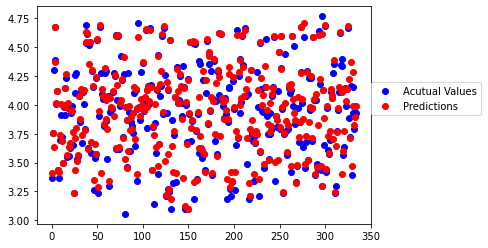

In [72]:
fig, ax = plt.subplots()
x1 = np.arange(0, len(df1), 1)
ax.scatter(x1, df1["actual values"], c='b', label="Acutual Values")
ax.scatter(x1, df1["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

Mean Squared Error (MSE)

In [73]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.03169641078751796